In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


In [7]:
df = df.drop(columns = 'CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<Axes: >

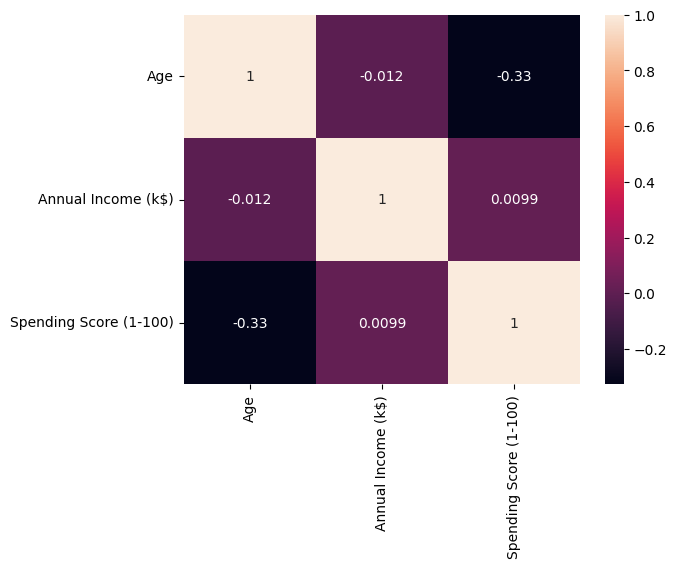

In [8]:
num_col = [col for col in df.columns if df[col].dtype != 'object']

sns.heatmap(df[num_col].corr(),annot = True)

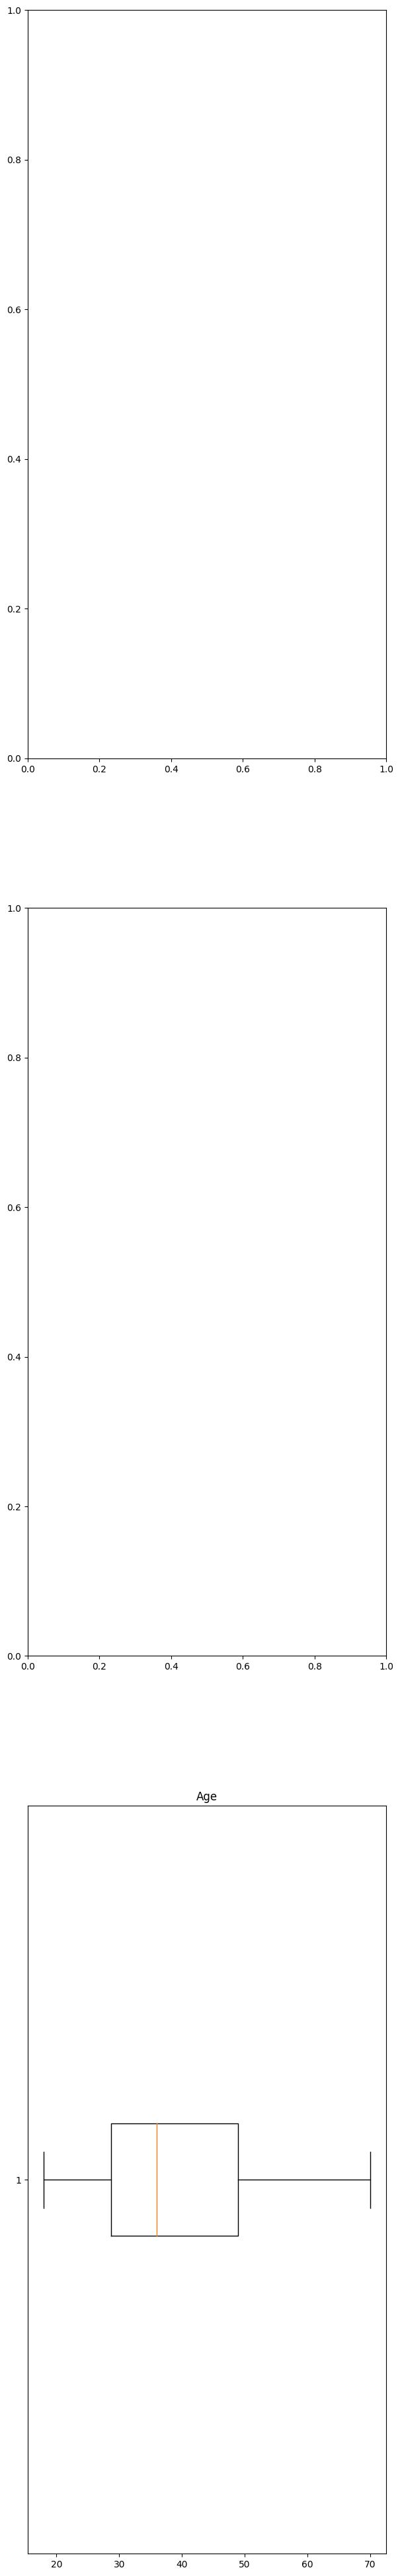

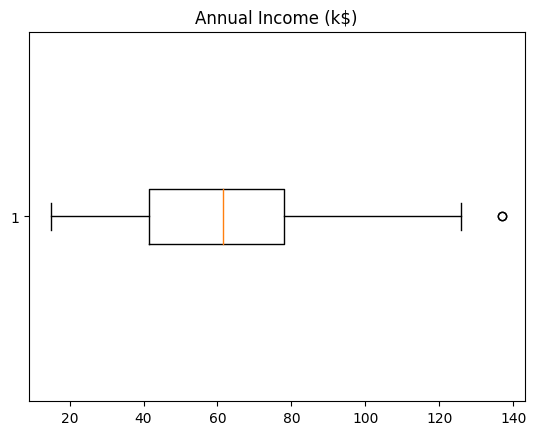

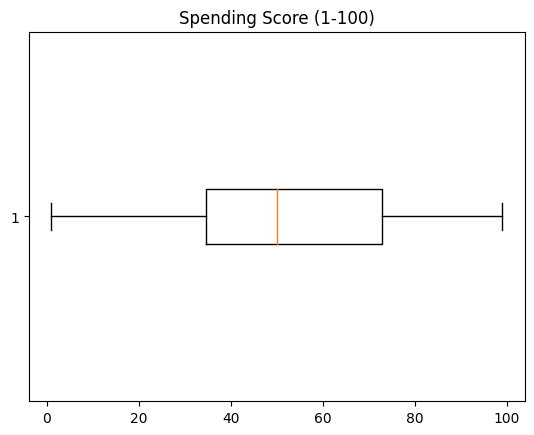

In [10]:
fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df[i],vert = False)
  plt.show()

In [11]:
mean = np.mean(df['Annual Income (k$)'])
std = np.std(df['Annual Income (k$)'])

lower = mean - 2 * std
upper = mean + 2 * std

df2 = df[(df['Annual Income (k$)'] >= lower) & (df['Annual Income (k$)'] <= upper)]

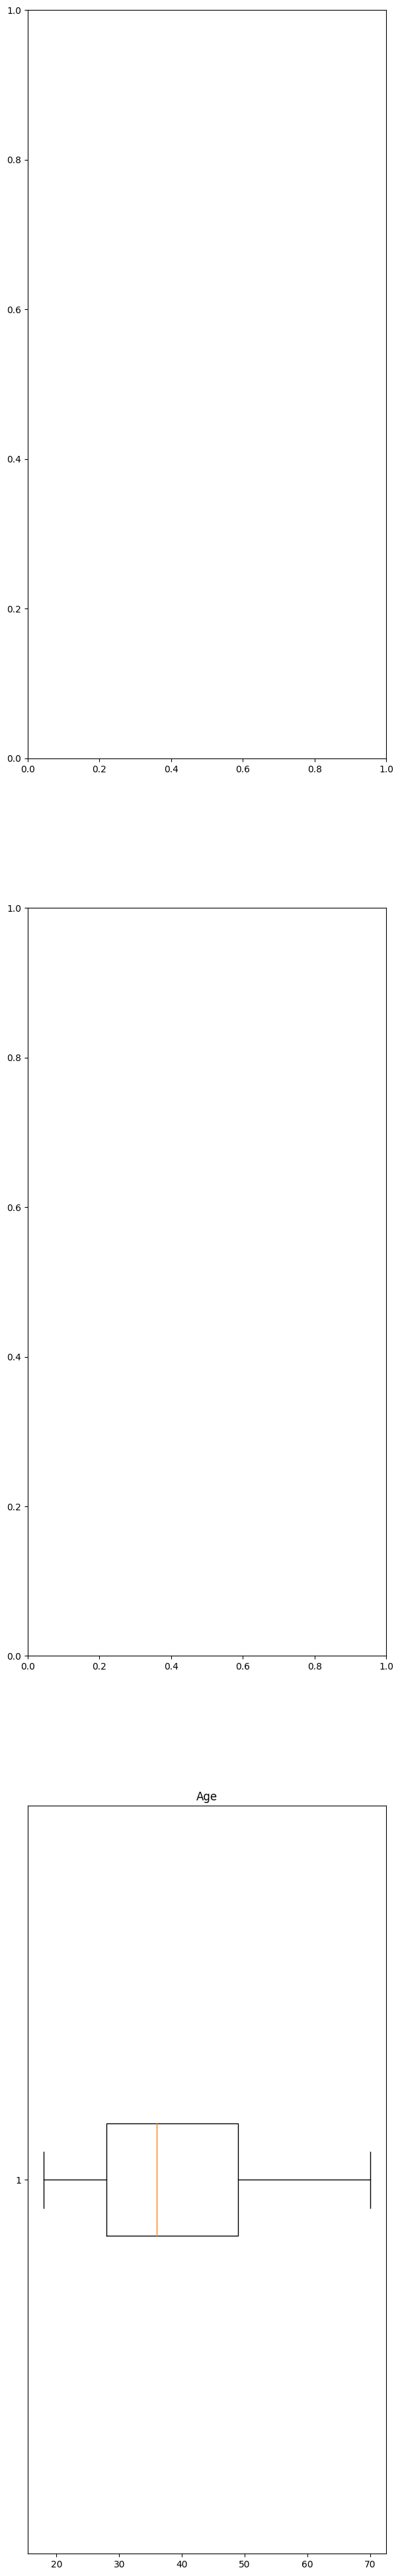

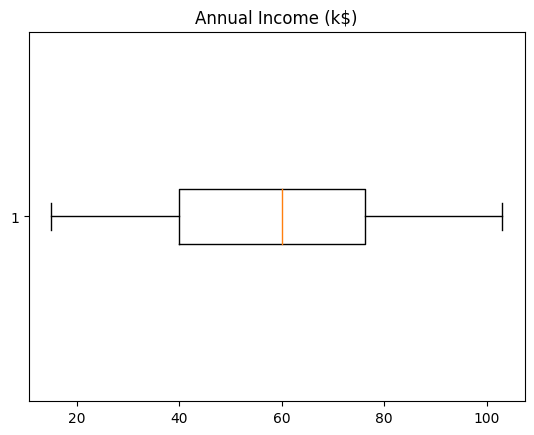

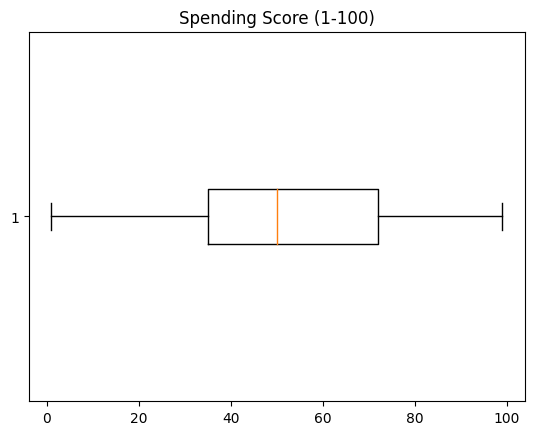

In [12]:
num_col = [col for col in df2.columns if df2[col].dtype != 'object']

fig,axs = plt.subplots(len(num_col),1,figsize = (7,50))

for i,j in zip(num_col,range(len(num_col))):
  plt.title(i)
  axs[j] = plt.boxplot(df2[i],vert = False)
  plt.show()

In [13]:
cat_col = [col for col in df2.columns if df2[col].dtype == 'object']

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_col:
  df2[col] = encoder.fit_transform(df2[col])

df2.head()

<ipython-input-13-1bf3df9c6a01>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[col])


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df2)

scaled_pd = pd.DataFrame(scaled,columns = df2.columns)

scaled_pd.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.011364,0.051020
3,0.0,0.096154,0.011364,0.775510
4,0.0,0.250000,0.022727,0.397959


In [15]:
X = scaled_pd

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4)

kmeans.fit(X)

print(silhouette_score(X,kmeans.labels_))

0.33097957879699963


In [21]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4)

y_hc = hc.fit_predict(X)

print(silhouette_score(X,y_hc))

0.31466671110388267
